In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import sklearn
import torch
import gym
from sklearn import datasets

In [3]:
digits = datasets.load_digits()

In [16]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [26]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
imgs = digits.images.reshape()
imgs.shape

(1797, 8, 8)

In [58]:
indices = np.arange(imgs.shape[0])
print indices[:5]
np.random.shuffle(indices)
print indices[:5]

[0 1 2 3 4]
[ 125 1248 1048 1097 1617]


In [68]:
part = 3 * indices.size / 4
training_X = digits.images[indices[:part]]
training_Y = digits.target[indices[:part]]
testing_X = digits.images[indices[part:]]
testing_Y = digits.target[indices[part:]]
training_X.shape, training_Y.shape, testing_X.shape, testing_Y.shape 

((1347, 8, 8), (1347,), (450, 8, 8), (450,))

In [73]:
training_X = training_X.reshape(-1,training_X.shape[1]*training_X.shape[2])
testing_X = testing_X.reshape(-1,testing_X.shape[1]*testing_X.shape[2])

In [74]:
from sklearn import svm

In [103]:
model = svm.LinearSVC()

In [104]:
model.fit(training_X, training_Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [105]:
pred_Y = model.predict(testing_X)

In [106]:
results = testing_Y - pred_Y == 0
print np.sum(results), results.size

431 450


In [102]:
def my_and(a, b):
    if a:
        return b
    return a

<IPython.core.display.Javascript object>


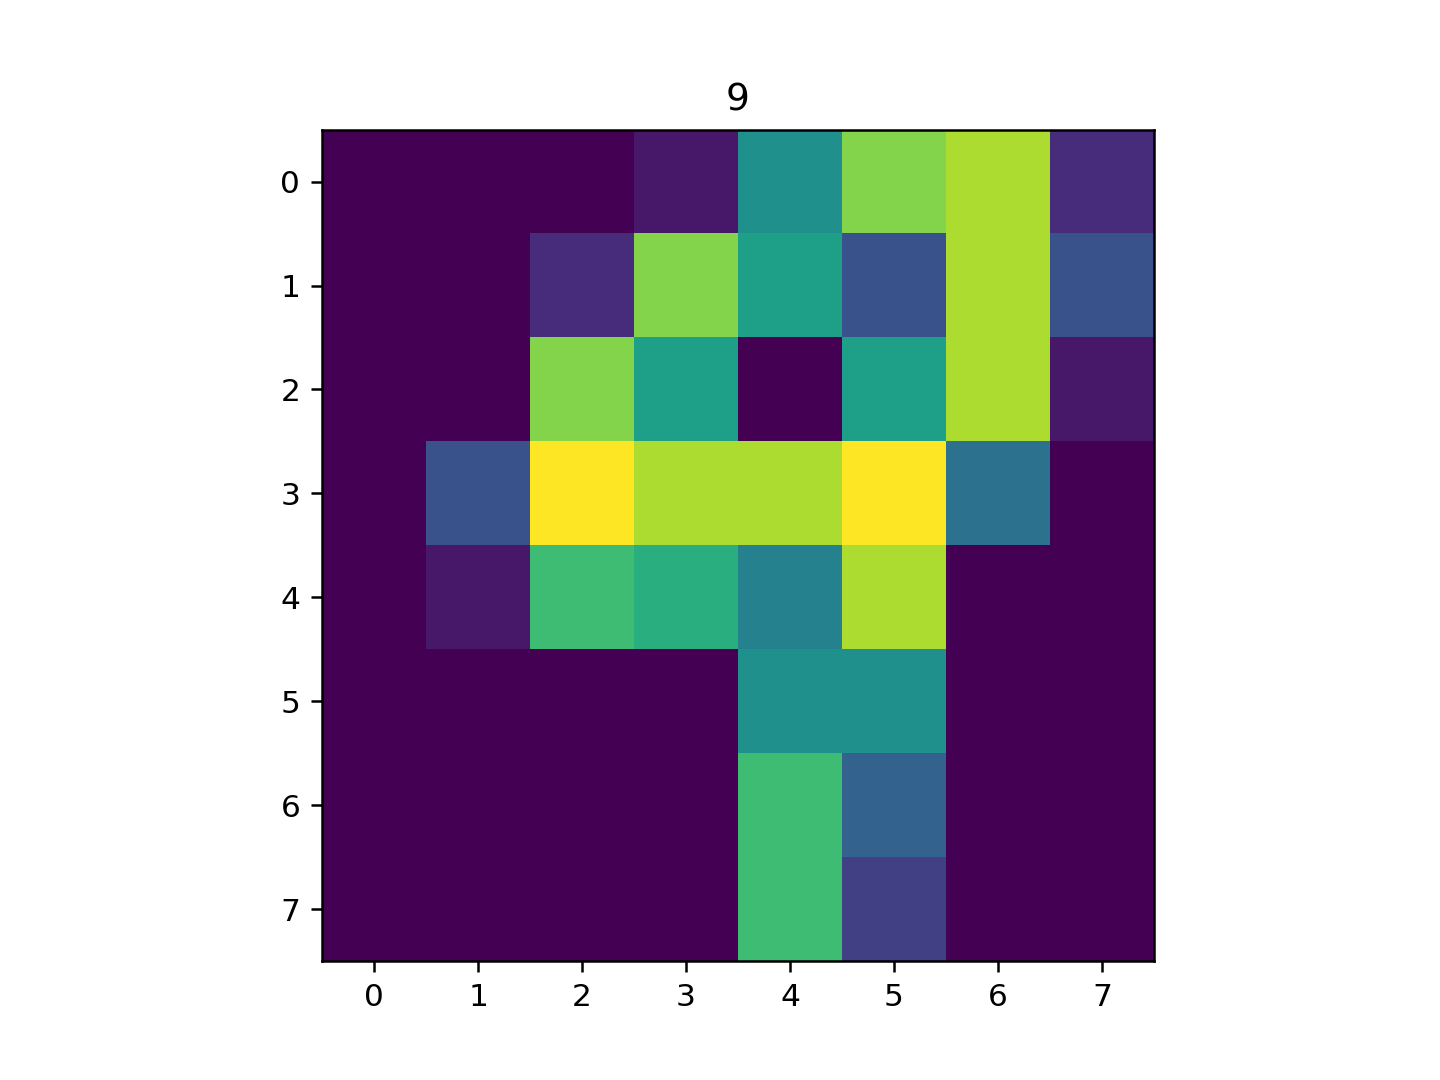

In [77]:
i = 18
plt.imshow(training_X[i].reshape(8,8))
plt.title(training_Y[i])